# Predicting Passenger Satisfaction

* The dataset contains an airline passenger satisfaction survey.

## Primary Question:

* Can you predict passenger satisfaction?
* What factors are associated with passenger satisfaction?

## Data Preparation

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import mean,std
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import BaggingRegressor, StackingClassifier, RandomForestRegressor, RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, mean_squared_error, r2_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
data1 = pd.read_csv("/Users/ruojiakuang/Desktop/GSB 545 Advanced ML/data1.csv")
data2 = pd.read_csv("/Users/ruojiakuang/Desktop/GSB 545 Advanced ML/data2.csv")

In [3]:
data1.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
data2.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
data1.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
data2.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
df = pd.concat([data1, data2])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [9]:
df.drop(columns="Unnamed: 0",inplace=True)

In [10]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [11]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Fill missing values in Arrival Delay in Minutes with the most frequent values in that column. 

In [12]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Check whether the dataset is balanced

In [14]:
df["satisfaction"].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

In [15]:
# Find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables

The categorical variables are :

 ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [16]:
df[categorical].head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Female,Loyal Customer,Business travel,Eco,satisfied
1,Female,Loyal Customer,Business travel,Business,satisfied
2,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied
3,Male,Loyal Customer,Business travel,Business,satisfied
4,Female,Loyal Customer,Business travel,Eco,satisfied


### Summary of categorical variables

* There are 5 categorical variables in the dataset.

* The categorical variables are given by Gender, Customer Type, Type of Travel, Class,satisfaction

* Satisfaction is the target variable.

/var/folders/b7/mnycbv9n0bg3t692k2d0yzpc0000gn/T/ipykernel_17040/3319475333.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


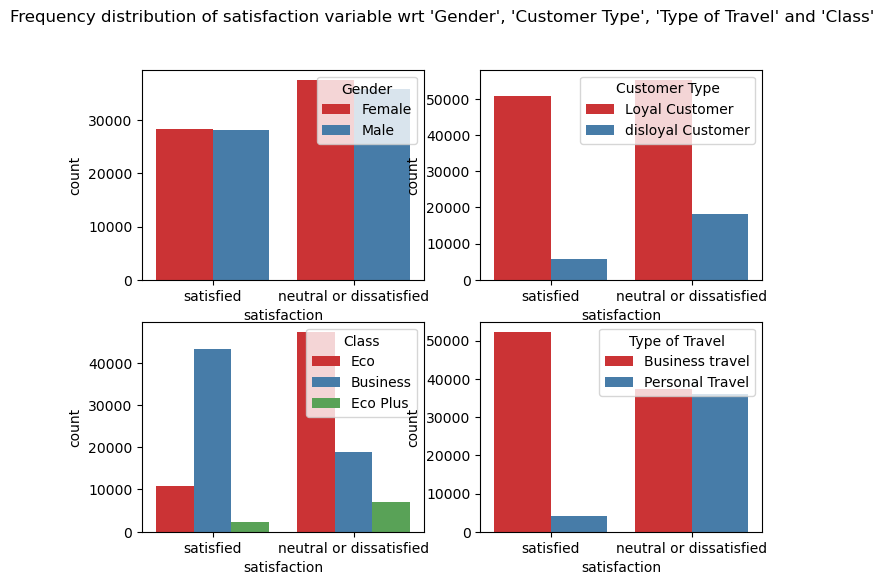

In [17]:
# Visualizing satisfaction and gender variables
# f, ax = plt.subplots(figsize=(8, 6))
f, ax = plt.subplots(figsize=(8, 6))
plt.subplot(2, 2, 1)

ax = sns.countplot(x="satisfaction", hue="Gender", data=df, palette="Set1")
# ax.set_title("Frequency distribution of satisfaction variable wrt Gender")


plt.subplot(2, 2, 2)
# f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="satisfaction", hue="Customer Type", data=df, palette="Set1")
# ax.set_title("Frequency distribution of satisfaction variable wrt Customer Type")


plt.subplot(2, 2, 3)
# f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="satisfaction", hue="Class", data=df, palette="Set1")
# ax.set_title("Frequency distribution of satisfaction variable wrt Class")


plt.subplot(2, 2, 4)
# f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="satisfaction", hue="Type of Travel", data=df, palette="Set1")
# ax.set_title("Frequency distribution of satisfaction variable wrt Type of Travel")
plt.suptitle("Frequency distribution of satisfaction variable wrt 'Gender', 'Customer Type', 'Type of Travel' and 'Class'")
plt.show()

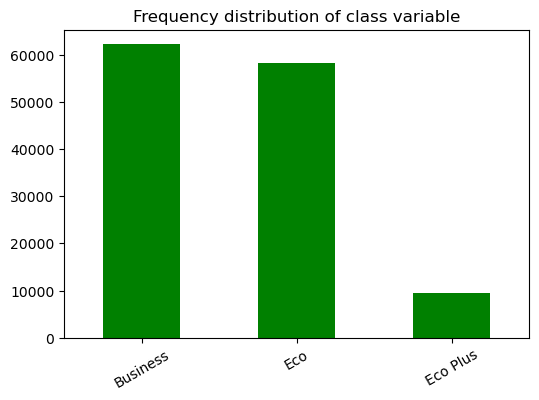

In [18]:
f, ax = plt.subplots(figsize=(6, 4))
ax = df.Class.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of class variable")
ax.set_xticklabels(df.Class.value_counts().index, rotation=30)
plt.show()

In [19]:
# Explore Numerical Variables 
# Find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 19 numerical variables

The numerical variables are :

 ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [20]:
len(numerical)

19

In [21]:
df[numerical].head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,19556,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,90035,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,12360,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,77959,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,36875,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0


### Summary of numerical variables

* There are 19 numerical variables.
* These are given by id, Age, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes
* All of the numerical variables are discrete.

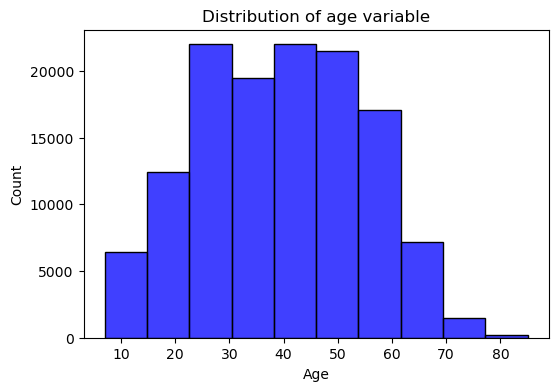

In [22]:
f, ax = plt.subplots(figsize=(6,4))
x = df['Age']
ax = sns.histplot(x, bins=10, color='blue')
plt.title("Distribution of age variable")
plt.show()

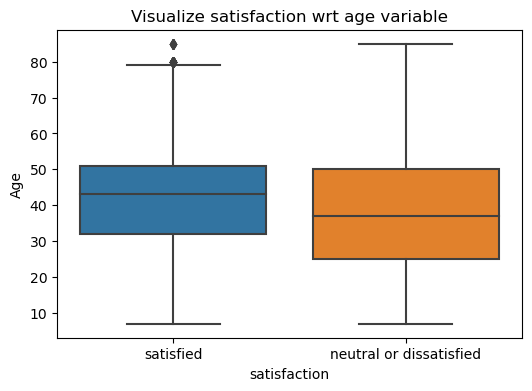

In [23]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.boxplot(x="satisfaction", y="Age", data=df)
ax.set_title("Visualize satisfaction wrt age variable")
plt.show()

### Encode variables and split training and testing dataset

In [24]:
for label in df.columns:
    df[label] = LabelEncoder().fit(df[label]).transform(df[label])

df.describe()
df.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19555,0,0,45,0,1,74,5,4,3,...,5,5,5,4,2,5,5,50,44,1
1,90034,0,0,29,0,0,2678,1,1,3,...,4,4,4,3,3,4,5,0,0,1
2,12359,1,1,13,0,1,102,2,0,2,...,2,4,1,2,2,2,2,0,0,0
3,77958,1,0,37,0,0,3192,0,0,0,...,1,1,1,0,3,1,4,0,6,1
4,36874,0,0,42,0,1,1042,2,3,4,...,2,2,2,1,4,2,4,0,20,1


In [25]:
# Split data into separate training and test set
X = df.drop(['satisfaction','id'], axis=1)
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Random Forest Model

* Random Forest model with default paramrter setting resulted in Recall rate: 94.18% and Total Accurary rate:96.45%.
* Below is also the confusion Matrix results.

In [26]:
# Random forest model
rf_model = RandomForestClassifier(n_estimators=300, random_state=1)

# Fit the stacking model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the performance of the stacking model on the test data
y_pred = rf_model.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Recall: 0.9418252979896815
Confusion Matrix:
[[14466   268]
 [  654 10588]]
Accuracy: 0.9645056975669849


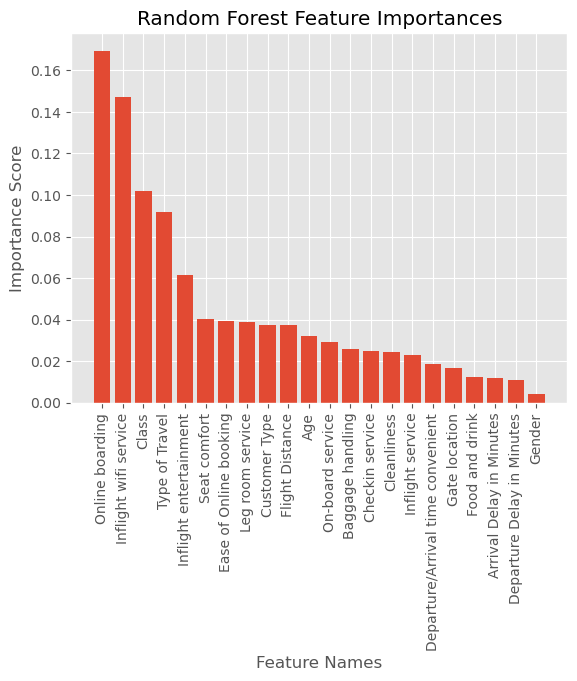

In [27]:
# Get the feature importances and their corresponding feature names
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a dataframe of feature importances with their corresponding names
df_importances = pd.DataFrame({'feature_names': feature_names, 'importances': importances}).sort_values('importances', ascending=False)

# Plot the feature importances
plt.style.use('ggplot')
plt.bar(df_importances['feature_names'], df_importances['importances'])
plt.xticks(rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importances')
plt.show()

#### Optimized Random Forest Model

Several hyper parameter tuning tried to enhance Random Forest model classification power, final tuning involed: n_estimators=100, random_state=1,max_depth=7, min_samples_split=5, and min_samples_leaf=2.
Best Random Forest with model resulted in Recall rate: 91.29% and Total Accurary rate:93.25%.

In [ ]:
# define RandomForestClassifier model
rf_model = RandomForestClassifier()

# define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

# print the best parameters found
print("Best Parameters: ", grid_result.best_params_)

# use the best model for predictions
best_model = grid_result.best_estimator_
predictions = best_model.predict(X_test)

In [29]:
# Evaluate the performance of the stacking model on the test data
y_pred = best_model.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Recall: 0.914161181284469
Confusion Matrix:
[[14000   734]
 [  965 10277]]
Accuracy: 0.9345934708962119


### XGBoost Model

* XGBoost mode with default paramrter setting result in Recall rate: 94.38% and Total Accurary rate:96.37%.
* Below is also the confusion Matrix results.

In [30]:
# calculate the ratio of negative to positive samples in the training data
#neg_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()

# define XGBClassifier model 
xgboost_model = XGBClassifier()

# Fit the stacking model on the training data
xgboost_model.fit(X_train, y_train)


# Evaluate the performance of the stacking model on the test data
y_pred = xgboost_model.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Recall: 0.9437822451521082
Confusion Matrix:
[[14423   311]
 [  632 10610]]
Accuracy: 0.9636972590083154


#### Optimized XGBoost

Several hyper-parameters tuning were tried involving to enhance the overal model performance, with the focus to enhance the Recall rate to measure the proportion of actual dissatisfied passengers that are correctly predicted by the model

* Below are the main effective parameters tuning based on the tried tuning set to enhance the accurary rate

    * learning_rate: Lower values can prevent overfitting but may require more iterations to converge.

    * n_estimators: Increasing this parameter sometimes leads to less accurate classification power, possibly due to overfitting.

    * max_depth: Controlling the maximum depth of the tree can prevent overfitting; tuning this parameter was effective in enhancing accuracy.

The best XGBoost model with default paramrter setting result in Recall rate: 94.38% and Total Accurary rate:96.37%.

Using feature important function in XGBoost model, Online boarding Category came as the most important feature, followed by Type of Travel, Inflight wifi service and class as per the below column chart.

In [31]:
# define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# perform grid search
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

# print the best parameters found
print("Best Parameters: ", grid_result.best_params_)

# use the best model for predictions
best_model = grid_result.best_estimator_
predictions = best_model.predict(X_test)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}


In [32]:
# Define XGBClassifier model 

#learning_rate: 0.3 #max_depth: 5 #n_estimators: 150 
xgboost_model = XGBClassifier(learning_rate=0.3,
                        max_depth=5,
                         n_estimators=150
 )

# Fit the stacking model on the training data
xgboost_model.fit(X_train, y_train)


# Evaluate the performance of the stacking model on the test data
y_pred = xgboost_model.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Recall: 0.9428037715708949
Confusion Matrix:
[[14407   327]
 [  643 10599]]
Accuracy: 0.9626578380043117


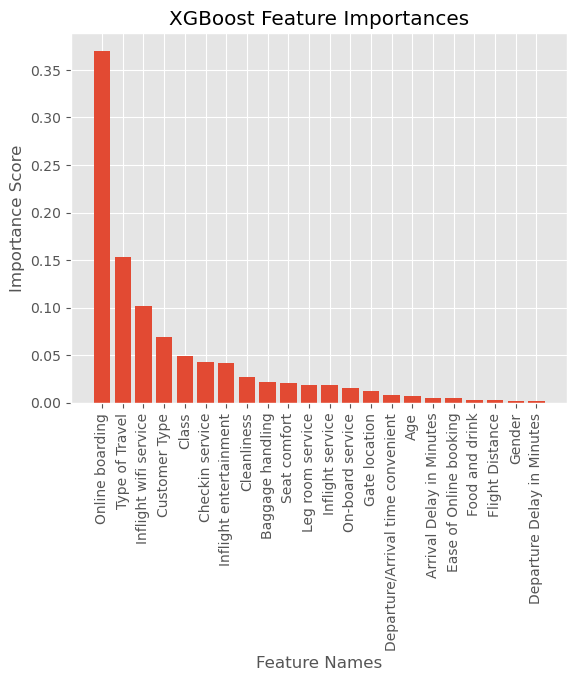

In [33]:
# Get the feature importances and their corresponding feature names
importances = xgboost_model.feature_importances_
feature_names = X.columns

# Create a dataframe of feature importances with their corresponding names
df_importances = pd.DataFrame({'feature_names': feature_names, 'importances': importances}).sort_values('importances', ascending=False)

# Plot the feature importances
plt.style.use('ggplot')
plt.bar(df_importances['feature_names'], df_importances['importances'])
plt.xticks(rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Importance Score')
plt.title('XGBoost Feature Importances')
plt.show()

### Conclusion

Forest models and XGBoost were tried and optimized for the best performance in predicting passengers' satisfaction.

Two models came with roughly equal results considering Recall rate, overall accuracy rate and overall confusion metrix performance. 

#### Comments 

* In particular, I would encourage you to make specific criticisms of the dataset and survey as you understand them, and possibly even make suggestions for how to improve them if they were to be administered again.
    * We should probably consider the correlation of each variables and try to avoid the overfitting of the models.

* Who can you generalize your work and results to? How helpful is all of this to an airline?
    * This result can help the airline companies on customer retentions. And put more efforts on the most important features listed above. 